In [1]:
import os
import numpy as np
import matplotlib.pyplot as plt

from elderflower.task import Run_Detection, Match_Mask_Measure, Run_PSF_Fitting
from elderflower.plotting import AsinhNorm, LogNorm, colorbar

# Setup

In [2]:
obj_name = 'test'
filt = 'r'

work_dir = 'test/'
fn  = 'test/cutout.fits'

bounds = ((50, 50, 750, 750))

# 1. Run in Function Way

# Detection

In [3]:
ZP = Run_Detection(fn, obj_name, filt,
                   threshold=10, work_dir=work_dir,
                   ZP_keyname='REFZP', ZP=None,
                   config_path='default.sex')

Run SExtractor on test/cutout.fits...
Read zero-point from header : ZP = 27.150
CATALOG saved as /Users/qliu/dragonfly/psf/test/test.cat
SEGMENTATION saved as /Users/qliu/dragonfly/psf/test/test_seg.fits


# Preparation

Measure the intensity at R = 12 for stars < 15.0
            as normalization of fitting

Read Image : test/cutout.fits
BACKVAL: 1050.41 +/- 4.00 , ZP: 27.15

Match field [50, 50, 750, 750] with catalog

Measure Sky Patch (X min, Y min, X max, Y max) :
[50, 50, 750, 750]


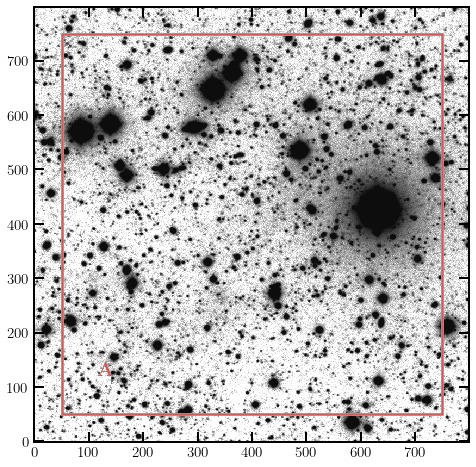

Search 0.344 deg around:
<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (163.88737293, 36.73836146)>
Pan-STARRS rmag:  9.801 ~ 22.758
Pan-STARRS gmag:  10.131 ~ 22.573
Matched stars with Pan-STARRS rmag:  9.801 ~ 21.922
Matched bright stars with Pan-STARRS rmag:  7.083 ~ 14.876

Average Color Term [SE-catalog] = 0.11016


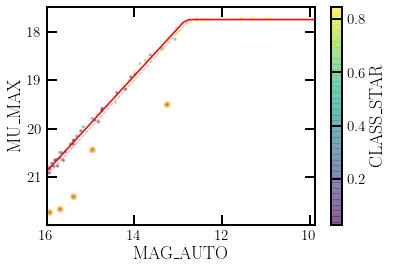

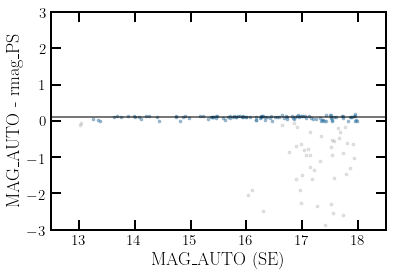

Mannually add unmatched bright stars to the catalog.


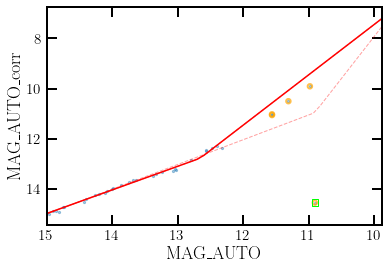

Save PANSTARRS catalog & matched sources in /Users/qliu/dragonfly/psf/test/Measure-PS1/

Fit 3-order empirical relation of aperture radii for catalog stars based on SE (X3.0)


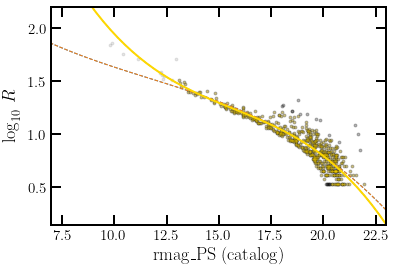


Make segmentation map based on catalog rmag: 3266 stars


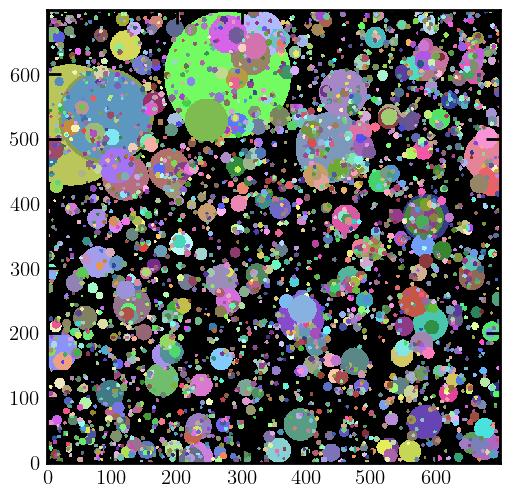

Save segmentation map made from catalog as /Users/qliu/dragonfly/psf/test/Measure-PS1/test-segm_rmag_catalog_X[50-750]Y[50-750].fits

Measure intensity at R = 12
                for catalog stars rmag < 15.0 in array([ 50,  50, 750, 750]):
completed: 9/36
Errorenous measurement: # 306
completed: 18/36
completed: 27/36
completed: 36/36
Saved to /Users/qliu/dragonfly/psf/test/Measure-PS1/test-thumbnail_rmag15_X[50-750]Y[50-750].pkl


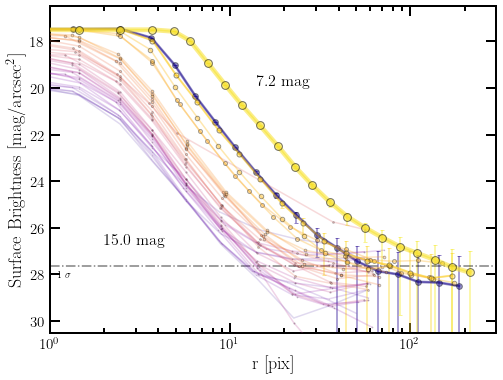

In [4]:
Match_Mask_Measure(fn, bounds, obj_name, band="R",
                   ZP=ZP, field_pad=50, pixel_scale=2.5,
                   save=True, use_PS1_DR2=False, work_dir=work_dir)

Magnitude Thresholds:  12.5, 10.0 mag
(<=> Flux Thresholds: 724435.96, 7244359.6 ADU)
# of medium bright (flux:7.3e+05~4.5e+06) stars: 8 
# of very bright (flux>7.9e+06) stars : 3
Not many bright stars, will draw in serial.

Read mask map built from catalog:  /Users/qliu/dragonfly/psf/test/Measure-PS1/test-segm_rmag_catalog_X[50-750]Y[50-750].fits
Detect and deblend source... Mask S/N > 3.0 (X3 enlarged)
Mask core regions: r < 24 (24) pix 


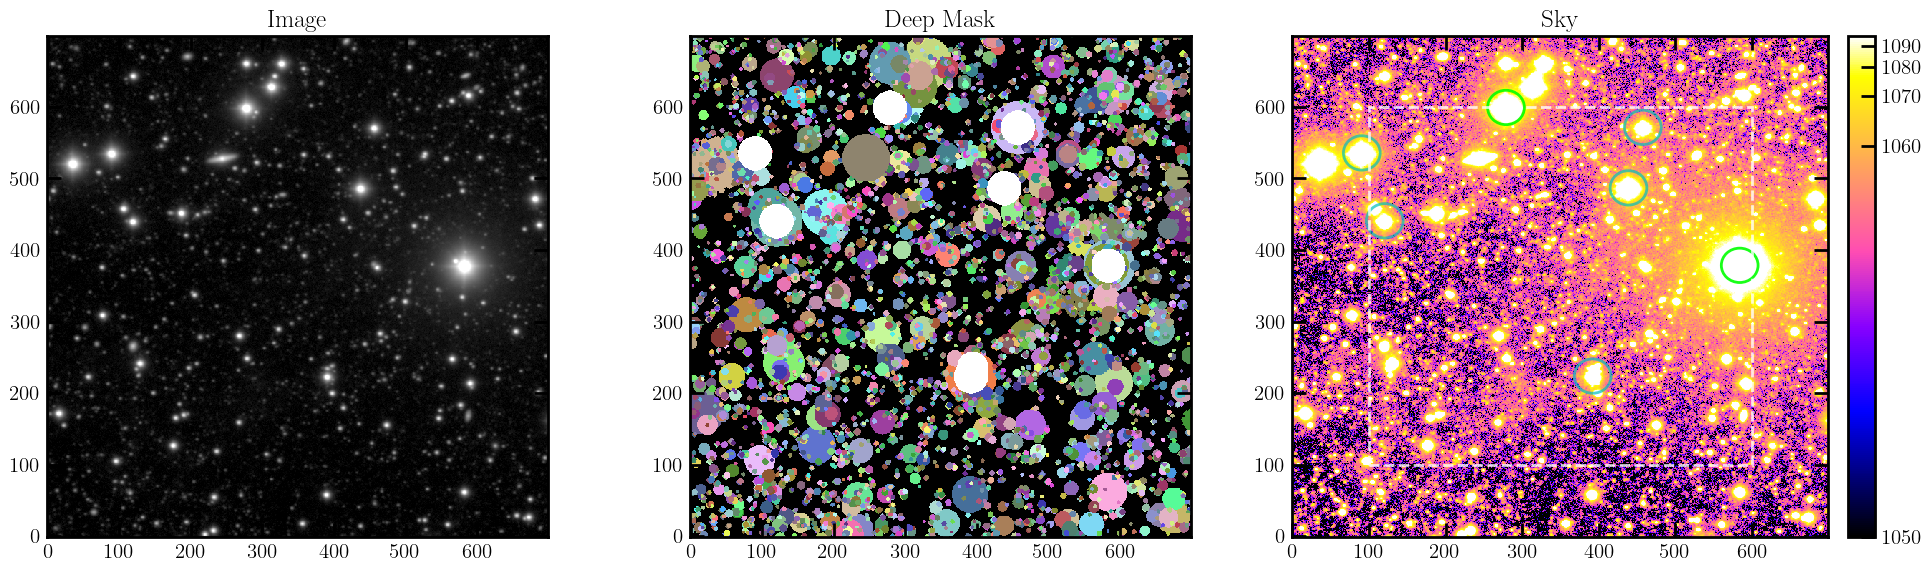

Use sky strips crossing very bright stars


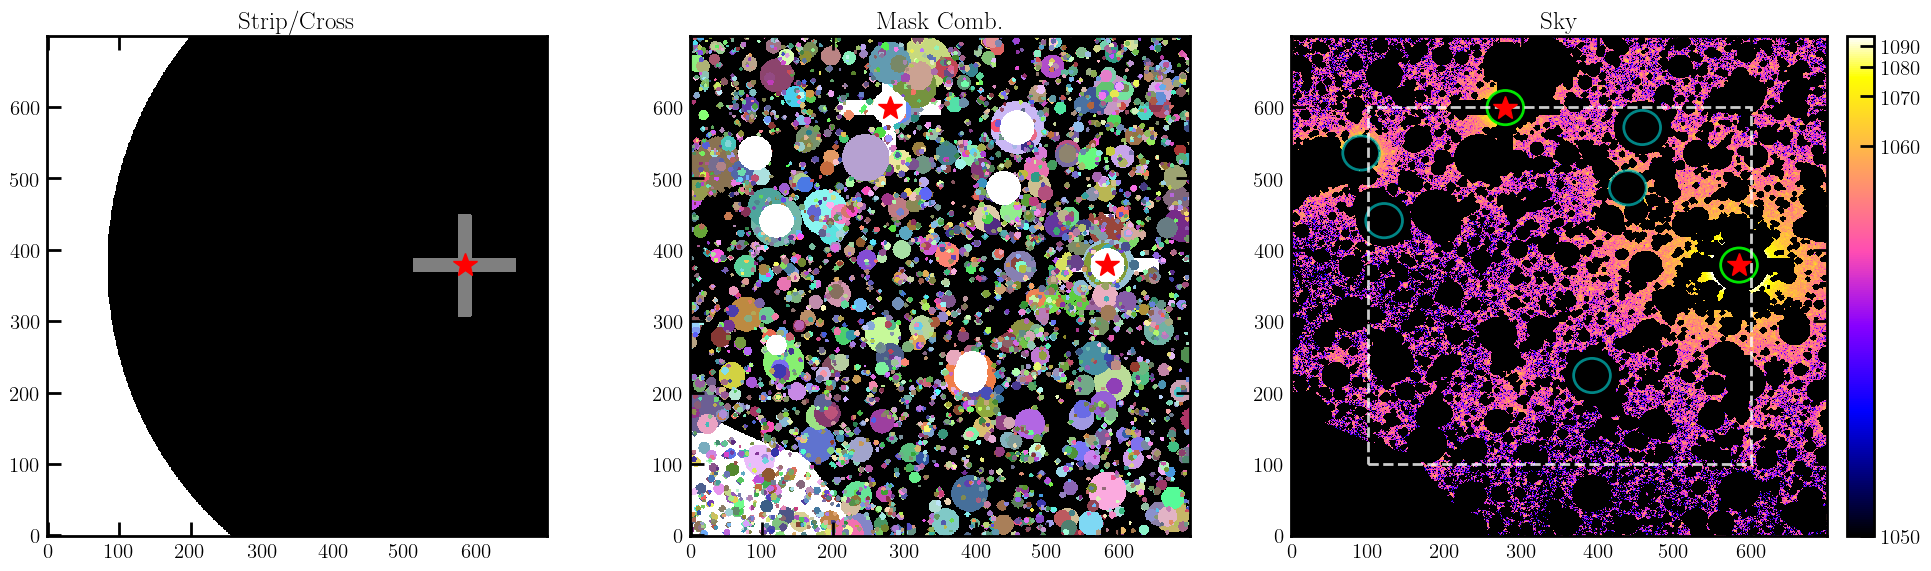

Image[ 50  50 750 750]
Estimate of Background: (1052.511 +/- 2.517)
> /Users/qliu/Documents/GitHub/elderflower/elderflower/task.py(749)Run_PSF_Fitting()
-> container = DF_Images.containers[i]


(Pdb)  c



Opening new pool: # of CPU used: 3


0it [00:00, ?it/s]

Run Nested Fitting for the image... Dim of params: 5


1655it [07:20,  3.76it/s, batch: 2 | bound: 53 | nc: 1 | ncall: 5890 | eff(%): 28.098 | loglstar: -228489.962 < -228487.156 < -228489.119 | logz: -228512.409 +/-  0.968 | stop:  6.931]  



Finish Fitting! Total time elapsed: 440 s

Pool Closed.
Saved to /Users/qliu/dragonfly/psf/test/testA-R-fit2p.res
Saved to /Users/qliu/dragonfly/psf/test/starsA.pkl


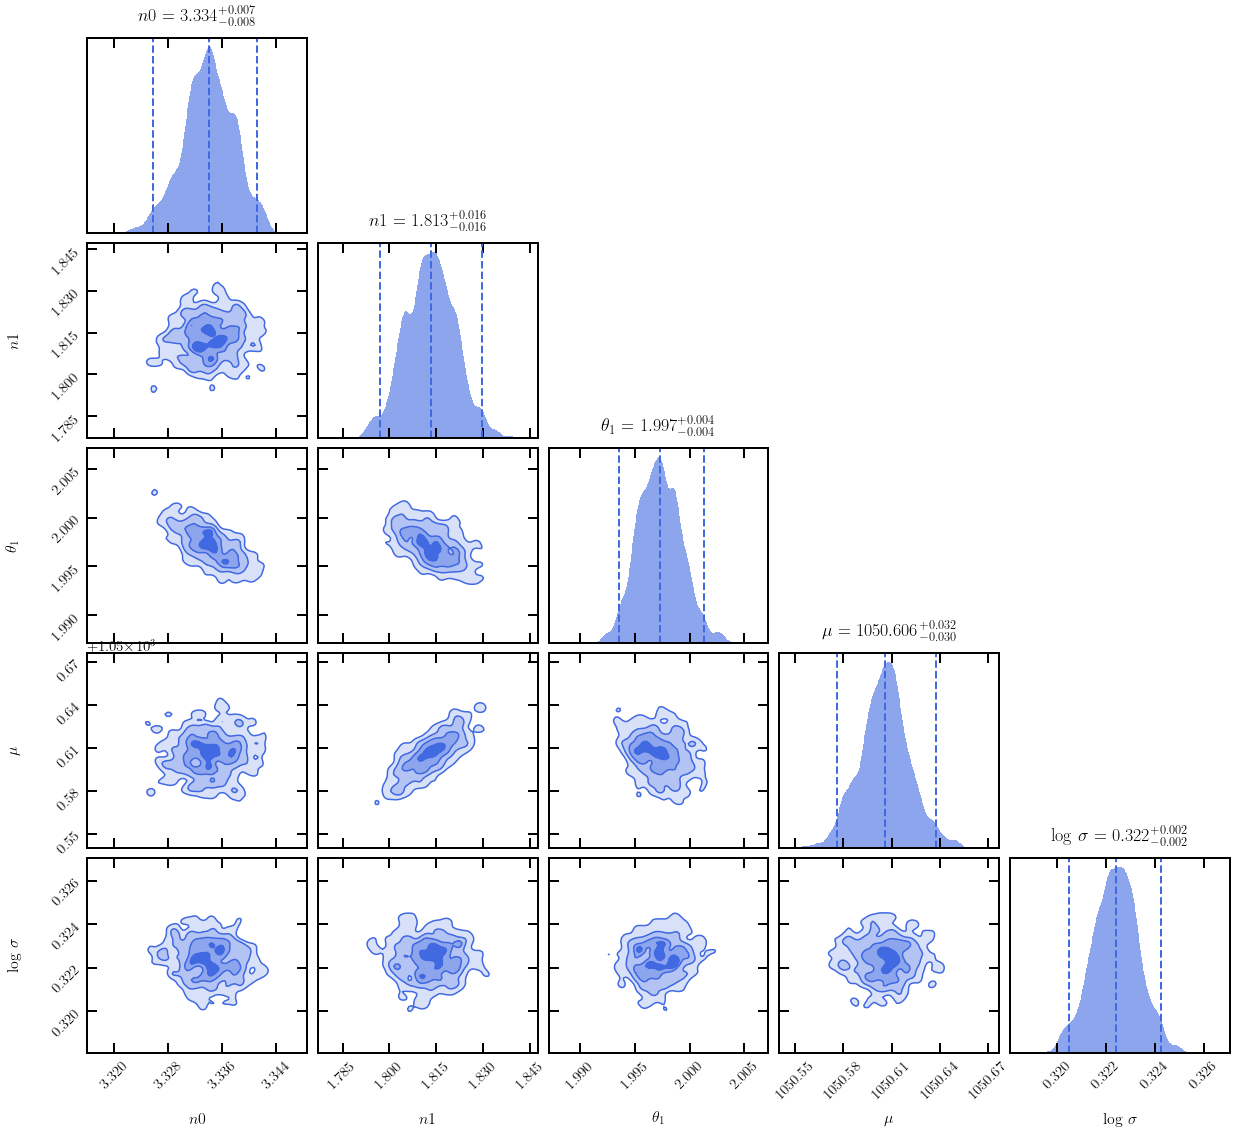

Fitting (mean) :  [3.334000e+00 1.813000e+00 1.997000e+00 1.050606e+03 3.220000e-01]
Fitting (median) :  [3.334000e+00 1.813000e+00 1.997000e+00 1.050606e+03 3.220000e-01]


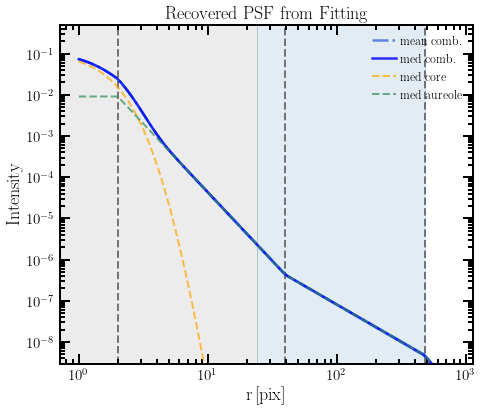

Bakground : 1050.61 +/- 2.10
Reduced Chi^2: 1.00006


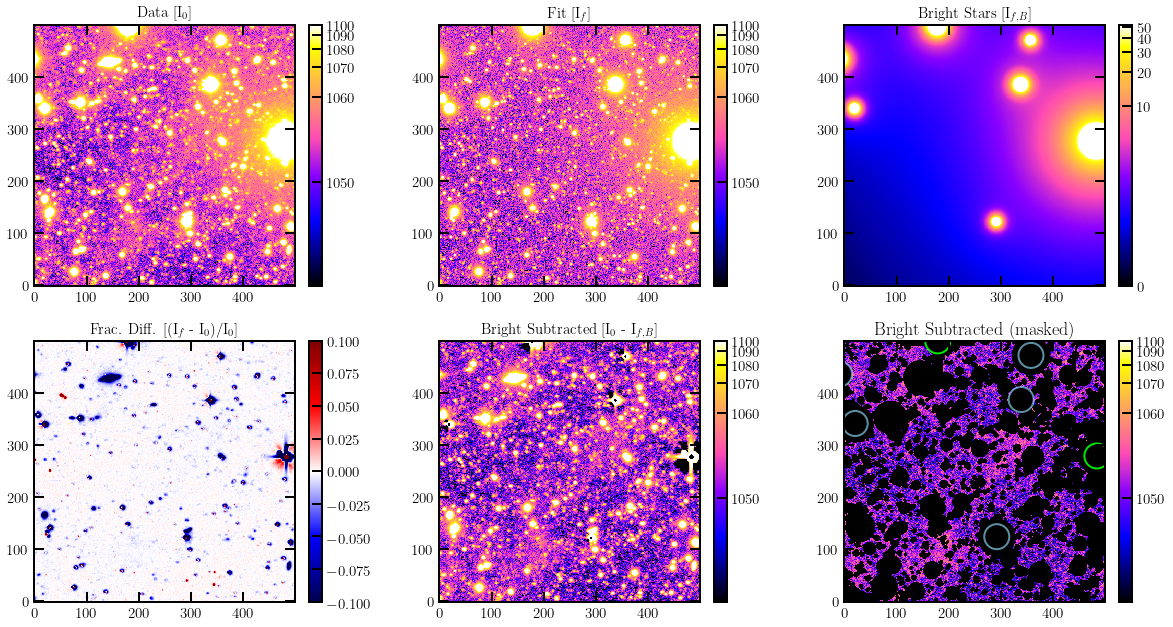

In [5]:
samplers = Run_PSF_Fitting(fn, bounds, obj_name, 
                            band="R", n_spline=2, n_cpu=4, 
                            r_core=24, mag_threshold=[12.5,10.],
                            r_scale=12, theta_cutoff=1200,
                            ZP=27.15, bkg=1050., pad=100, pixel_scale=2.5,
                            use_PS1_DR2=False, save=True, work_dir=work_dir)

# 2. Run by config.yaml

Run SExtractor on test/cutout.fits...
Read zero-point from header : ZP = 27.150
CATALOG saved as ./test/test.cat
SEGMENTATION saved as ./test/test_seg.fits
Loaded configuration file /Users/qliu/Documents/GitHub/elderflower/configs/./config.yml
Measure the intensity at R = 12 for stars < 15.0
            as normalization of fitting

Read Image : test/cutout.fits
BACKVAL: 1050.41 +/- 4.00 , ZP: 27.15

Match field [50, 50, 750, 750] with catalog

Measure Sky Patch (X min, Y min, X max, Y max) :
[50, 50, 750, 750]


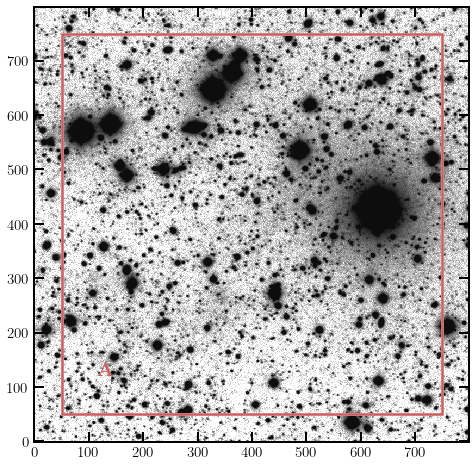

Search 0.344 deg around:
<SkyCoord (FK5: equinox=2000.0): (ra, dec) in deg
    (163.88737293, 36.73836146)>
Pan-STARRS rmag:  9.801 ~ 22.758
Pan-STARRS gmag:  10.131 ~ 22.573
Matched stars with Pan-STARRS rmag:  9.801 ~ 22.175
Matched bright stars with Pan-STARRS rmag:  7.083 ~ 14.876

Average Color Term [SE-catalog] = 0.09857


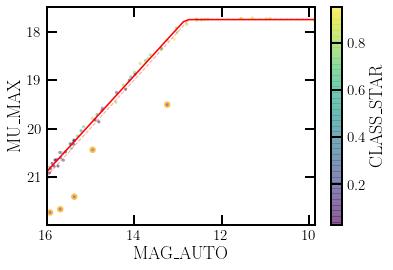

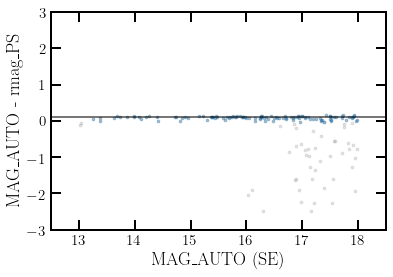

Mannually add unmatched bright stars to the catalog.


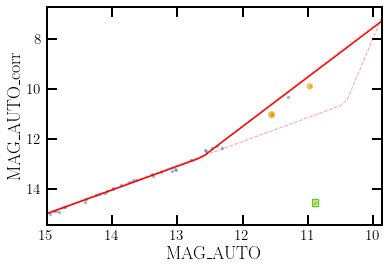

Save PANSTARRS catalog & matched sources in ./test/Measure-PS1/

Fit 3-order empirical relation of aperture radii for catalog stars based on SE (X3.0)


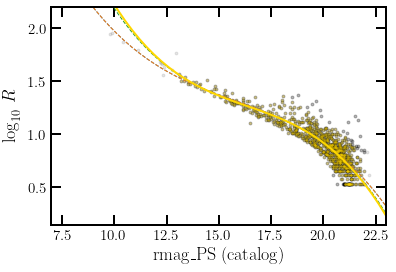


Make segmentation map based on catalog rmag: 3266 stars


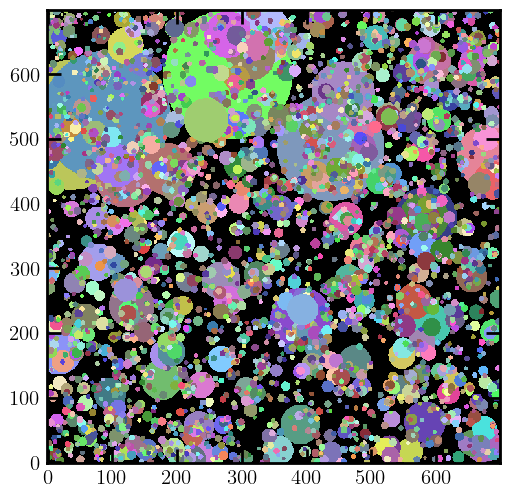

Save segmentation map made from catalog as ./test/Measure-PS1/test-segm_rmag_catalog_X[50-750]Y[50-750].fits

Measure intensity at R = 12
                for catalog stars rmag < 15.0 in array([ 50,  50, 750, 750]):
completed: 9/36
Errorenous measurement: # 665
completed: 18/36
completed: 27/36
completed: 36/36
Saved to ./test/Measure-PS1/test-thumbnail_rmag15_X[50-750]Y[50-750].pkl


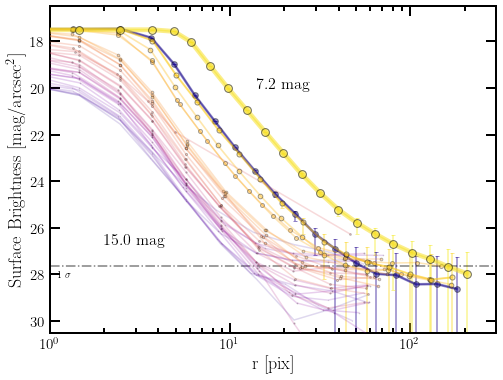

Magnitude Thresholds:  14, 11 mag
(<=> Flux Thresholds: 181970.09, 2884031.5 ADU)
# of medium bright (flux:1.8e+05~2.8e+06) stars: 19 
# of very bright (flux>5.3e+06) stars : 4
Not many bright stars, will draw in serial.

Read mask map built from catalog:  ./test/Measure-PS1/test-segm_rmag_catalog_X[50-750]Y[50-750].fits
Detect and deblend source... Mask S/N > 3.0 (X3 enlarged)
Mask core regions: r < 24 (24) pix 


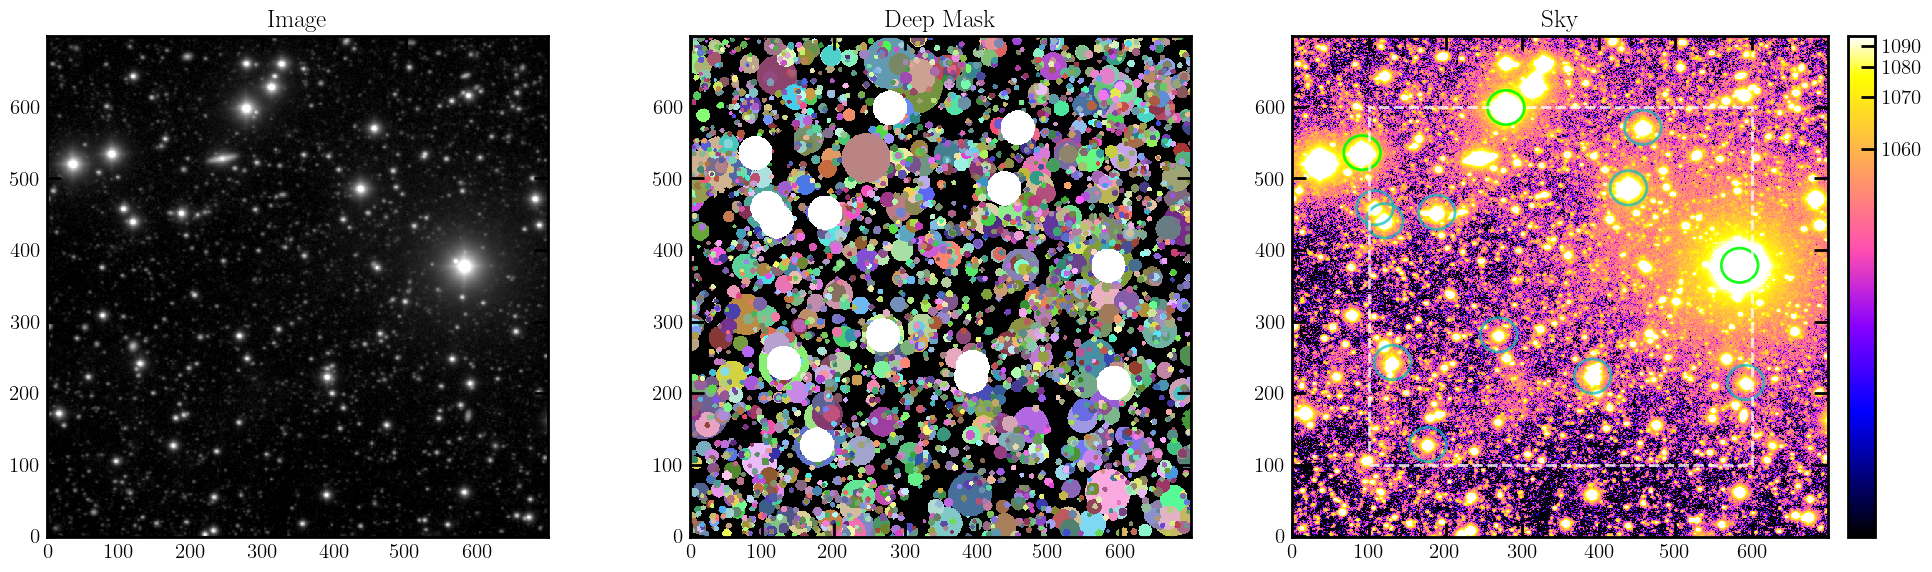

Use sky strips crossing very bright stars


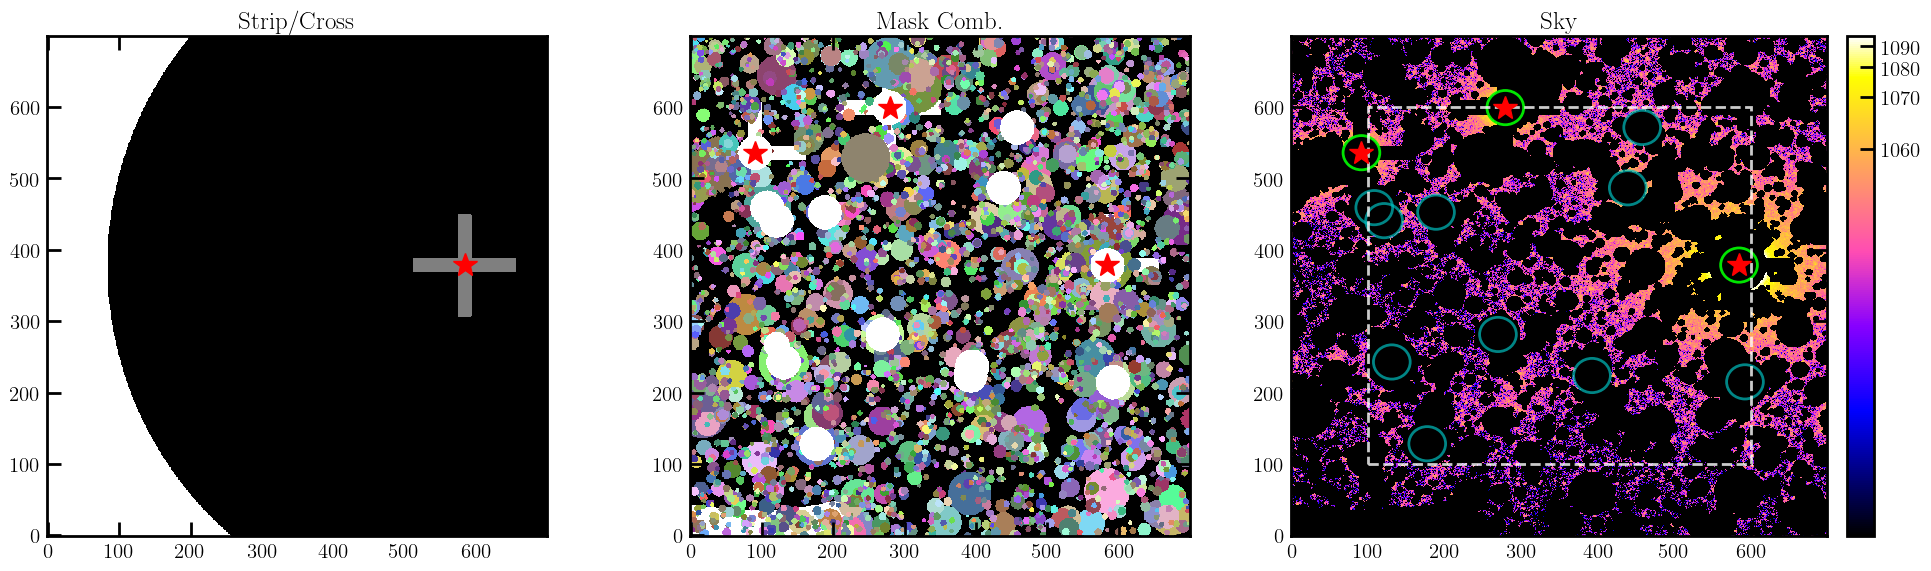

Image[ 50  50 750 750]
Estimate of Background: (1052.448 +/- 2.491)
> /Users/qliu/Documents/GitHub/elderflower/elderflower/task.py(749)Run_PSF_Fitting()
-> container = DF_Images.containers[i]


(Pdb)  c



Opening new pool: # of CPU used: 3


0it [00:00, ?it/s]

Run Nested Fitting for the image... Dim of params: 5


1491it [10:28,  2.37it/s, batch: 2 | bound: 80 | nc: 3 | ncall: 7959 | eff(%): 18.734 | loglstar: -174201.674 < -174198.471 < -174201.217 | logz: -174220.791 +/-  0.908 | stop:  5.321]  



Finish Fitting! Total time elapsed: 629 s

Pool Closed.
Saved to ./test/testA-r-fit2p.res
Saved to ./test/starsA.pkl


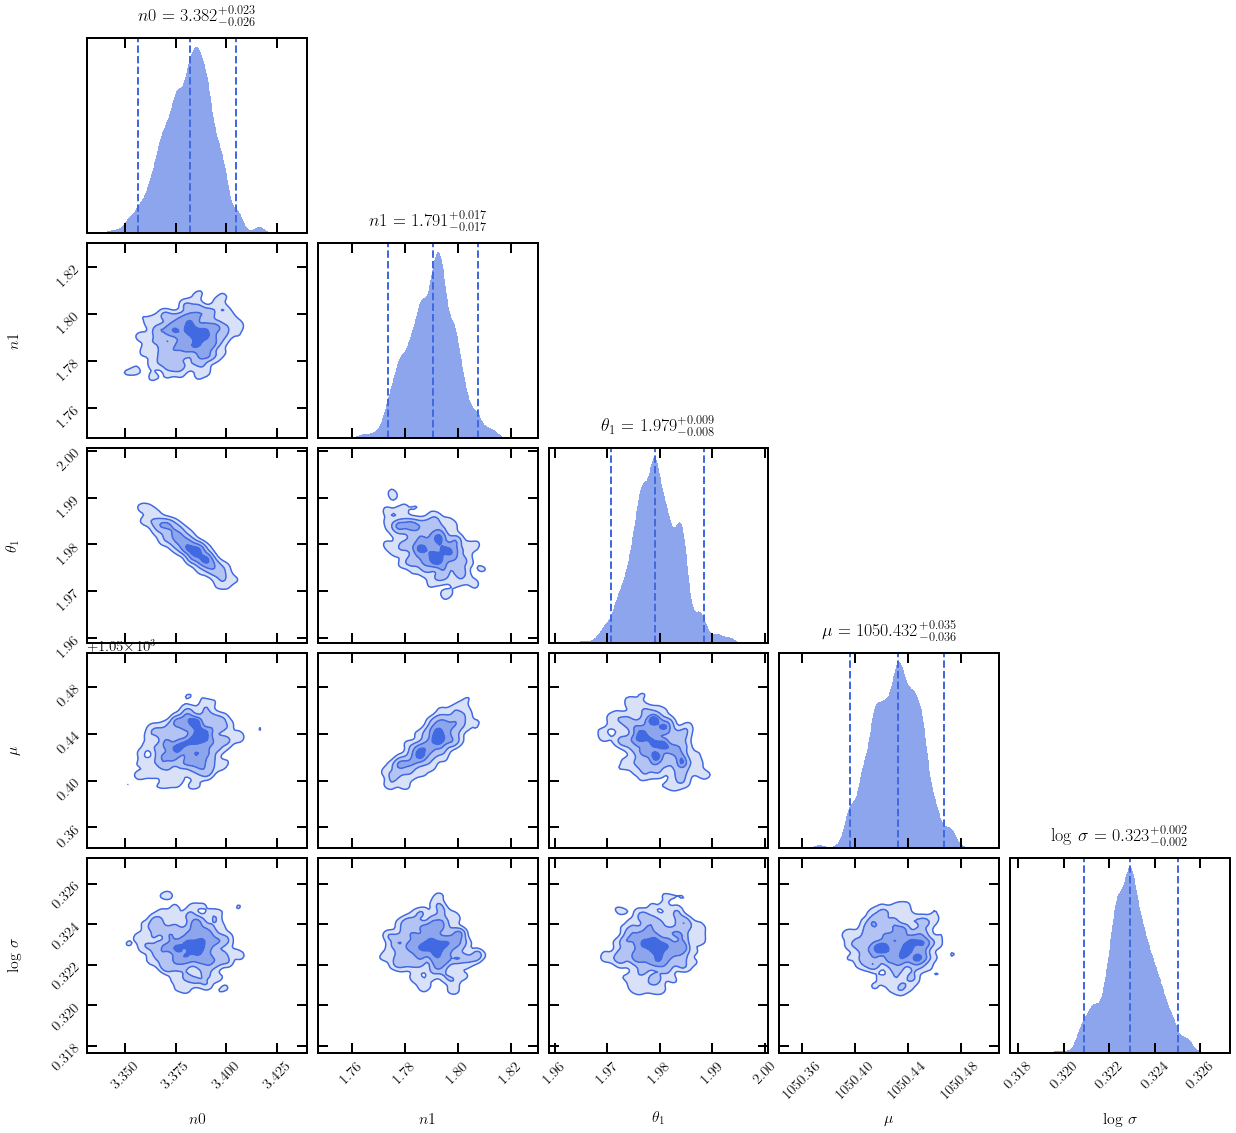

Fitting (mean) :  [3.382000e+00 1.790000e+00 1.979000e+00 1.050431e+03 3.230000e-01]
Fitting (median) :  [3.382000e+00 1.791000e+00 1.979000e+00 1.050432e+03 3.230000e-01]


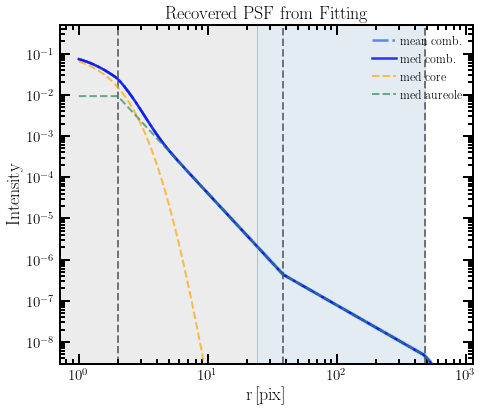

Bakground : 1050.43 +/- 2.10
Reduced Chi^2: 1.00185


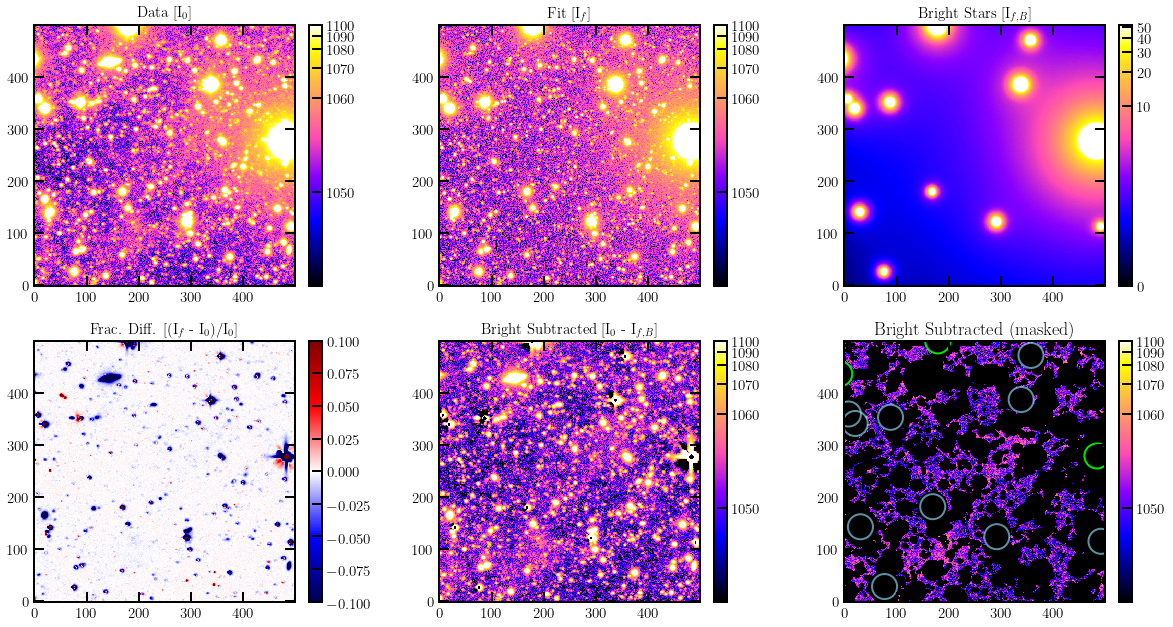

In [20]:
from elderflower.task import berry

elder = berry(fn, bounds,
              obj_name='test', band='r',
              work_dir='./test/')

elder.detection()
elder.run()

# 3. Load Results

In [6]:
from elderflower.sampler import Sampler
sampler = Sampler.read_results('test/test-R-fit2p.res')

Read fitting results test/test-R-fit2p.res
 {'run_time': 521.1, 'obj_name': 'test', 'band': 'R', 'n_spline': 2, 'bounds': array([ 50,  50, 750, 750]), 'r_scale': 12, 'n_c': 4, 'theta_cutoff': 1200, 'date': '2020-09-02'}


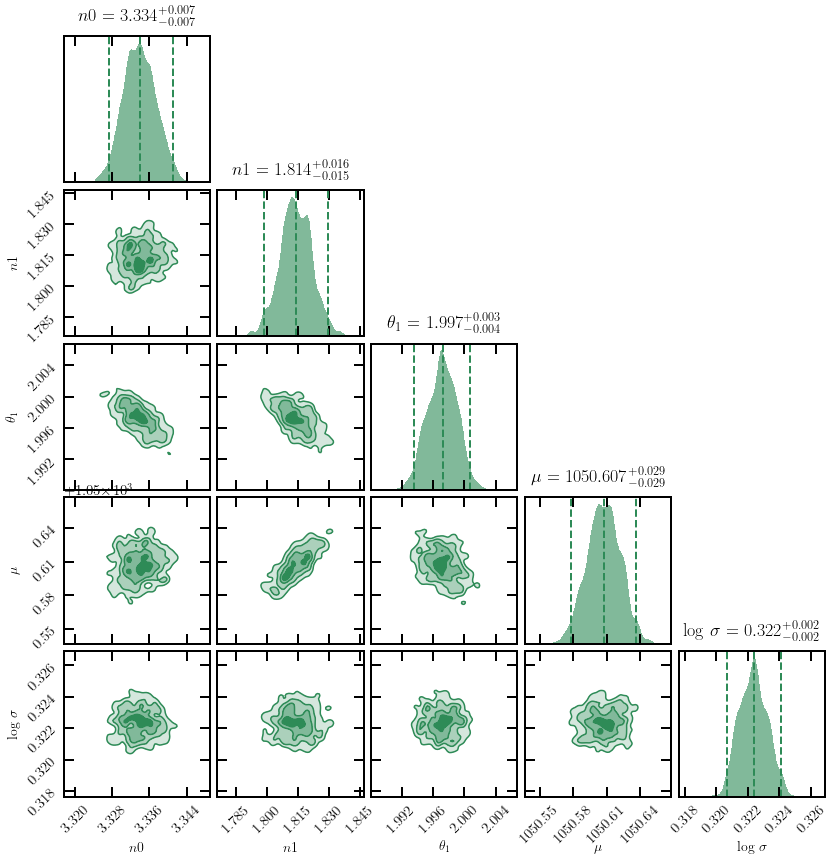

In [7]:
sampler.cornerplot(figsize=(12,12), color='seagreen', 
                   label_kwargs={'fontsize':14}, title_fmt='.3f',
                   title_kwargs={'fontsize':18, 'y': 1.04})

### Reconstruct PSF

In [8]:
from elderflower.utils import make_psf_from_fit

psf, params = make_psf_from_fit(sampler.results)

psf_core = psf.generate_core()

psf_aureole, psf_size = psf.generate_aureole(psf_range=1200) # arcsec

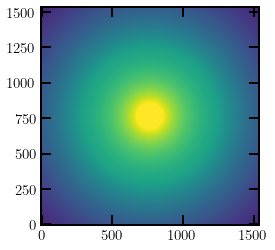

In [9]:
# Draw PSF in 2D
image_psf = psf.image_psf.array

plt.imshow(image_psf, norm=LogNorm(), vmin=1e-8, vmax=1e-5, cmap='viridis')

In [10]:
# Save 2D PSF model as fits
psf.write_psf_image(image_psf, filename='test/PSF_model_test-R.fits')

### Check constructed PSF by plotting profile

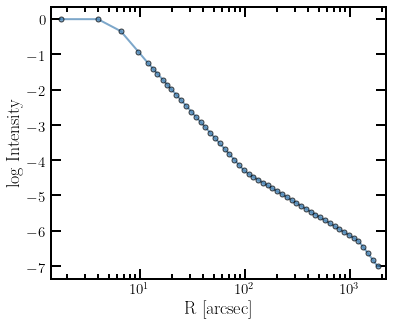

In [11]:
from elderflower.utils import cal_profile_1d
_, _, _ = cal_profile_1d(image_psf, mock=True,
                         pixel_scale=2.5, xunit="arcsec",
                         figsize=(6,5))

### Regenerate image fit

In [ ]:
from elderflower.io import load_pickle
stars = load_pickle('test/starsA.pkl')

In [12]:
sampler.generate_fit(psf, stars)

Read from test/starsA.pkl
Bakground : 1050.61 +/- 2.10


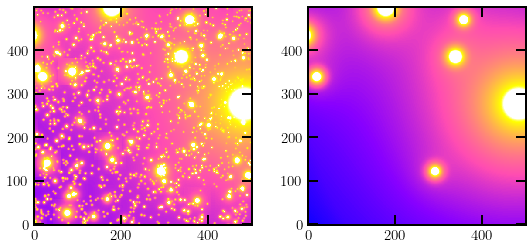

In [13]:
# Fitted image and bright stars
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(9,4))
ax1.imshow(sampler.image_fit, vmin=1050, vmax=1100, norm=LogNorm())
ax2.imshow(sampler.image_star, vmin=0, vmax=50, norm=LogNorm())

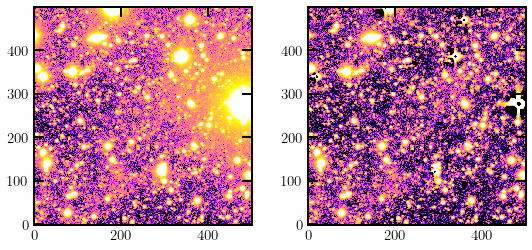

In [14]:
# Original image and aureole subtracted image
fig, (ax1,ax2) = plt.subplots(1,2,figsize=(9,4))
ax1.imshow(sampler.image, vmin=1050, vmax=1100, norm=LogNorm())
ax2.imshow(sampler.image - sampler.image_star, vmin=1050, vmax=1100, norm=LogNorm())